# My Uber Trips Analysis

First, I have imported all the libraries I need: pandas and numpy for data manipulation, seaborn and plotly for creating visually appealing graphs.

In [299]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

**Task 1:** Now I will create a function named 'wrangle'; that would handle the data prepartion for me.

In [300]:
def wrangle(filename):
    
    
    """A function that will:
       A. Read the data into a dataframe from a CSV file.
       B. Create a mask to include observations only for the city of Dhaka.
       C. Convert three timestamp values to datetime format and change from UTC to Asia/Dhaka Time zone.
       D. Rename the column 'Fare Amount' to 'Fare Amount BDT'.
       E. Create three bins for different fare ranges.
       F. Create a Year column.
       G. Round the hour column to two decimal places.
       H. Delete all the redundant columns.
     """
    
    
    #Read the file in a dataframe
    df =pd.read_csv(filename)
    
    # Mask for the city of Dhaka
    mask_city = df["city"] == "Dhaka"
    df=df[mask_city]
    
    # converting the Timsestamps to datetime formats with Dhaka Timezone
    df['Time Request'] =    pd.to_datetime (df['Time Request'], utc=True).dt.tz_convert('Asia/Dhaka')
    df['Time Trip Begin'] = pd.to_datetime (df['Time Trip Begin'], utc=True).dt.tz_convert('Asia/Dhaka')
    df['Time Dropoff'] =    pd.to_datetime (df['Time Dropoff'], utc=True).dt.tz_convert('Asia/Dhaka')
    
    #rename the column
    df['Fare Amount BDT'] = df["Fare Amount"]
    
    conditions = [
        (df['Fare Amount BDT'] <=  250),
        (df['Fare Amount BDT'] <= 490),
        (df['Fare Amount BDT'] <= 780),
        (df['Fare Amount BDT'] >= 781)
    ]
    
    
    values =["0-250 TK", "251-490 TK", "491-780 TK", "780TK+"]
    
    
    df['Fare Groups'] = np.select(conditions, values)
    df['Fare Groups'] = df['Fare Groups'].astype("category")
    
    #Putting a Year Column
    df["Year"] = df['Time Request'].dt.year.astype("category")
    
    #Round the Duration to 2
    df["duration_hour"] = df["duration_hour"].round(2)
    
    
    
    #delete redundant columns
    df.drop(columns = ["city", "Fare Currency", "Fare Amount"], inplace=True)
    
   
    
    
    
    return df

In [301]:
wrangle?

**Task 2:** with the wrangle function, I am reading the file into a dataframe 'df'

In [302]:
#Read the csv file into a dataframe and print the head
df=wrangle('Uber Rides.csv')
df.head(5)

,Product Type,Trip or Order Status,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Time Request,Time Trip Begin,Time Dropoff,duration_hour,Fare Amount BDT,Fare Groups,Year
0,UberX,COMPLETED,23.758028,90.35721,"2 Rd No. 1, Dhaka, Bangladesh",23.737625,90.406906,"160/A VIP Rd, Dhaka 1000, Bangladesh",6.07,2023-06-21 12:20:06+06:00,2023-06-21 12:34:47+06:00,2023-06-21 13:54:08+06:00,1.32,486.91,251-490 TK,2023
1,CNG,CANCELED,NaN,NaN,NaN,NaN,NaN,"160/A VIP Rd, Dhaka 1000, Bangladesh",0.00,2023-06-21 12:18:48+06:00,1970-01-01 06:00:00+06:00,1970-01-01 06:00:00+06:00,0.00,0.00,0-250 TK,2023
2,CNG,CANCELED,23.757340,90.41142,NaN,23.757360,90.411420,"160/A VIP Rd, Dhaka 1000, Bangladesh",0.00,2023-06-21 12:15:06+06:00,1970-01-01 06:00:00+06:00,1970-01-01 06:00:00+06:00,0.00,0.00,0-250 TK,2023
3,CNG,COMPLETED,23.757208,90.36164,"Dhaka, Bangladesh",23.748251,90.402380,"Above Meena Bazar, 3,4,5 floor, 15 New Eskaton...",3.30,2023-06-20 16:22:00+06:00,2023-06-20 16:28:33+06:00,2023-06-20 17:15:55+06:00,0.79,298.13,251-490 TK,2023
4,NaN,UNFULFILLED,NaN,NaN,NaN,NaN,NaN,"Unnamed Road, Dhaka, Bangladesh",0.00,2023-06-17 21:41:36+06:00,1970-01-01 06:00:00+06:00,1970-01-01 06:00:00+06:00,0.00,0.00,0-250 TK,2023


**Task 3:** Use df.info() to see the basic information of the dataset

In [303]:
#See the basic info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype                     
---  ------                --------------  -----                     
 0   Product Type          390 non-null    object                    
 1   Trip or Order Status  400 non-null    object                    
 2   Begin Trip Lat        358 non-null    float64                   
 3   Begin Trip Lng        358 non-null    float64                   
 4   Begin Trip Address    353 non-null    object                    
 5   Dropoff Lat           358 non-null    float64                   
 6   Dropoff Lng           358 non-null    float64                   
 7   Dropoff Address       365 non-null    object                    
 8   Distance (miles)      400 non-null    float64                   
 9   Time Request          400 non-null    datetime64[ns, Asia/Dhaka]
 10  Time Trip Begin       400 non-null    datetime64[n

We have observed the presence of null values. A number of trips were canceled, and these canceled trips contain empty cells. Let's check below to determine the total number of unsuccessful trips.

**Task 4:** Create a dataframe to aggregate Trip status

In [304]:
order_status = df["Trip or Order Status"].value_counts(normalize=True).rename("count").to_frame().reset_index()

In [305]:
order_status.head()

,index,count
0,COMPLETED,0.7025
1,CANCELED,0.2525
2,UNFULFILLED,0.0250
3,DRIVER_CANCELED,0.0200


**Task 5:** Create a barplot with seaborn to visualize the trip status

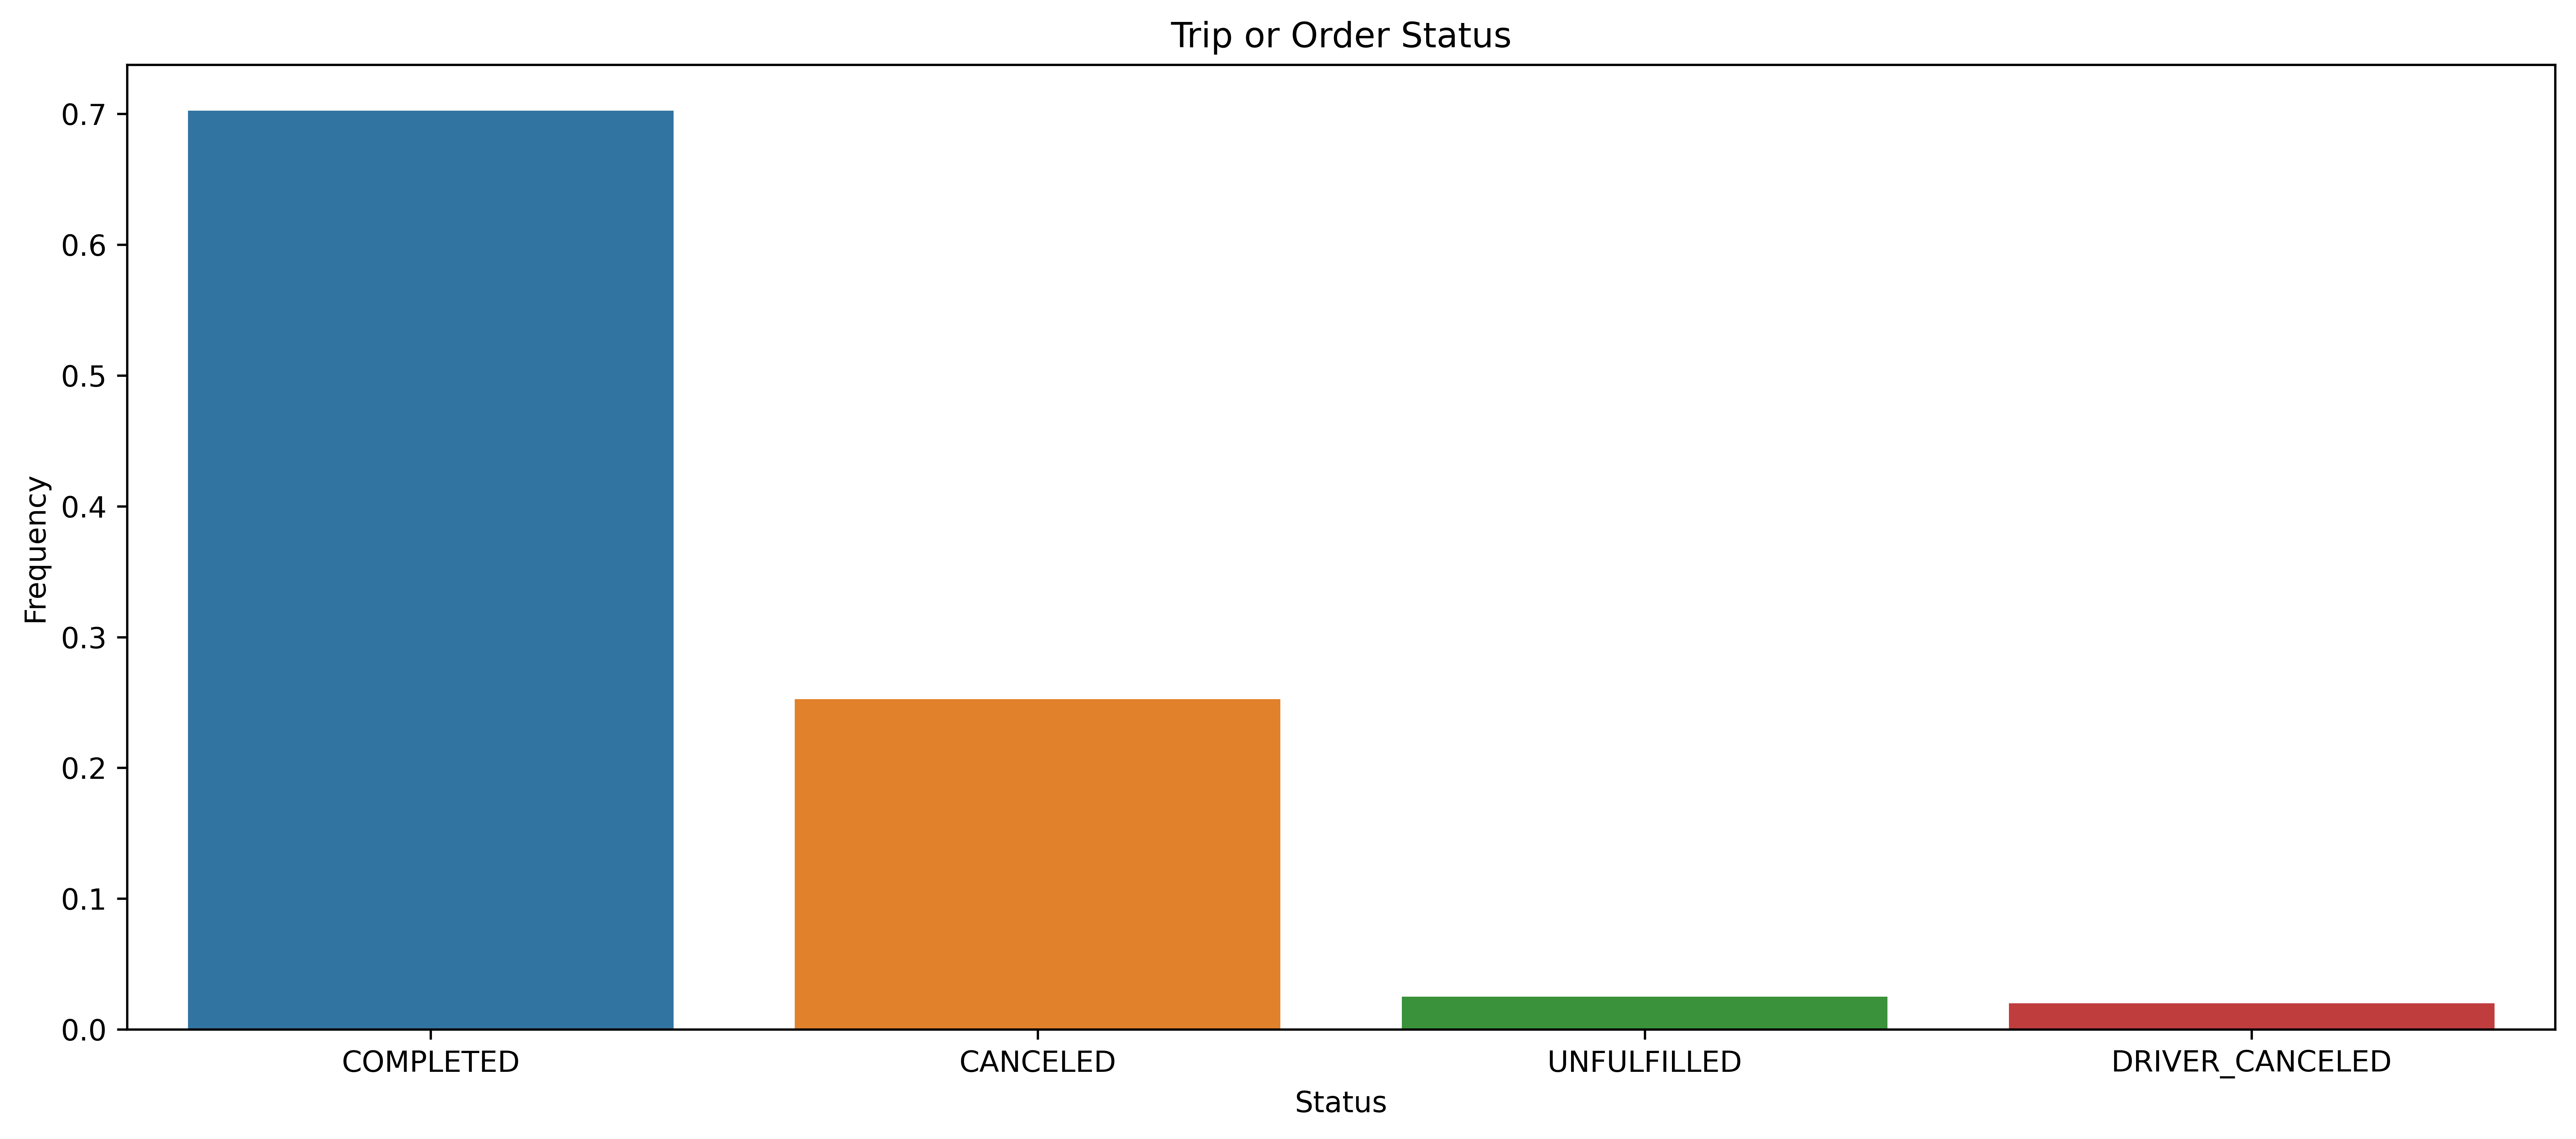

In [306]:
#Creating a barplot with seaborn
f, ax = plt.subplots(dpi = 600, figsize=(15, 6))
sns.barplot(
    x= "index",
    y="count",
    orient="v",
    data=order_status
)
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.title("Trip or Order Status");

Based on the chart above, it is evident that 30% of the rides have remained unsuccessful in some way. It would be interesting to investigate the underlying causes of these cancellations. Nevertheless, a cancellation rate of 30% is not a favorable indication. Factors such as traffic or other reasons might have compelled me to cancel these trips. 

### Analysis for Completed Trips

Now that we have seen that seventy percent of the requests have been successful, let's focus our discussion on this subset and explore interesting insights. First, create this subset using the following mask.

**Task 6:** Create a mask for the completed trips

In [307]:
# mask for completed rides
mask_trips = df["Trip or Order Status"]=="COMPLETED"
df= df[mask_trips] 

**Task 7:** Check the presence of null values in any of the columns

In [246]:
#Let's see if now we have null values or not
x = pd.Series(df.isna().sum())
print(x)

Product Type            0
Trip or Order Status    0
Begin Trip Lat          0
Begin Trip Lng          0
Begin Trip Address      0
Dropoff Lat             0
Dropoff Lng             0
Dropoff Address         0
Distance (miles)        0
Time Request            0
Time Trip Begin         0
Time Dropoff            0
duration_hour           0
Fare Amount BDT         0
Fare Groups             0
Year                    0
dtype: int64


The preceding command calculates the null values for each column and provides sum. We can observe that there are no null values present in our selected subset.

To initiate our analysis, let's begin by examining the frequency (count) of fare payments within the previously created bins. We will start by creating a dataframe to store this information and subsequently generate a plot using the seaborn library

**Task 8:** Aggregate the data into fare groups, count how many times a fare falls within each bin

In [308]:
fare_distribution = (
    df['Trip or Order Status']
    .groupby(df['Fare Groups'])
    .count().rename("Frequency")
    .to_frame()
    .reset_index()
)

In [309]:
fare_distribution.head()

,Fare Groups,Frequency
0,0-250 TK,136
1,251-490 TK,113
2,491-780 TK,28
3,780TK+,4


**Task 9:** Visualize the result with seanorn boxplot

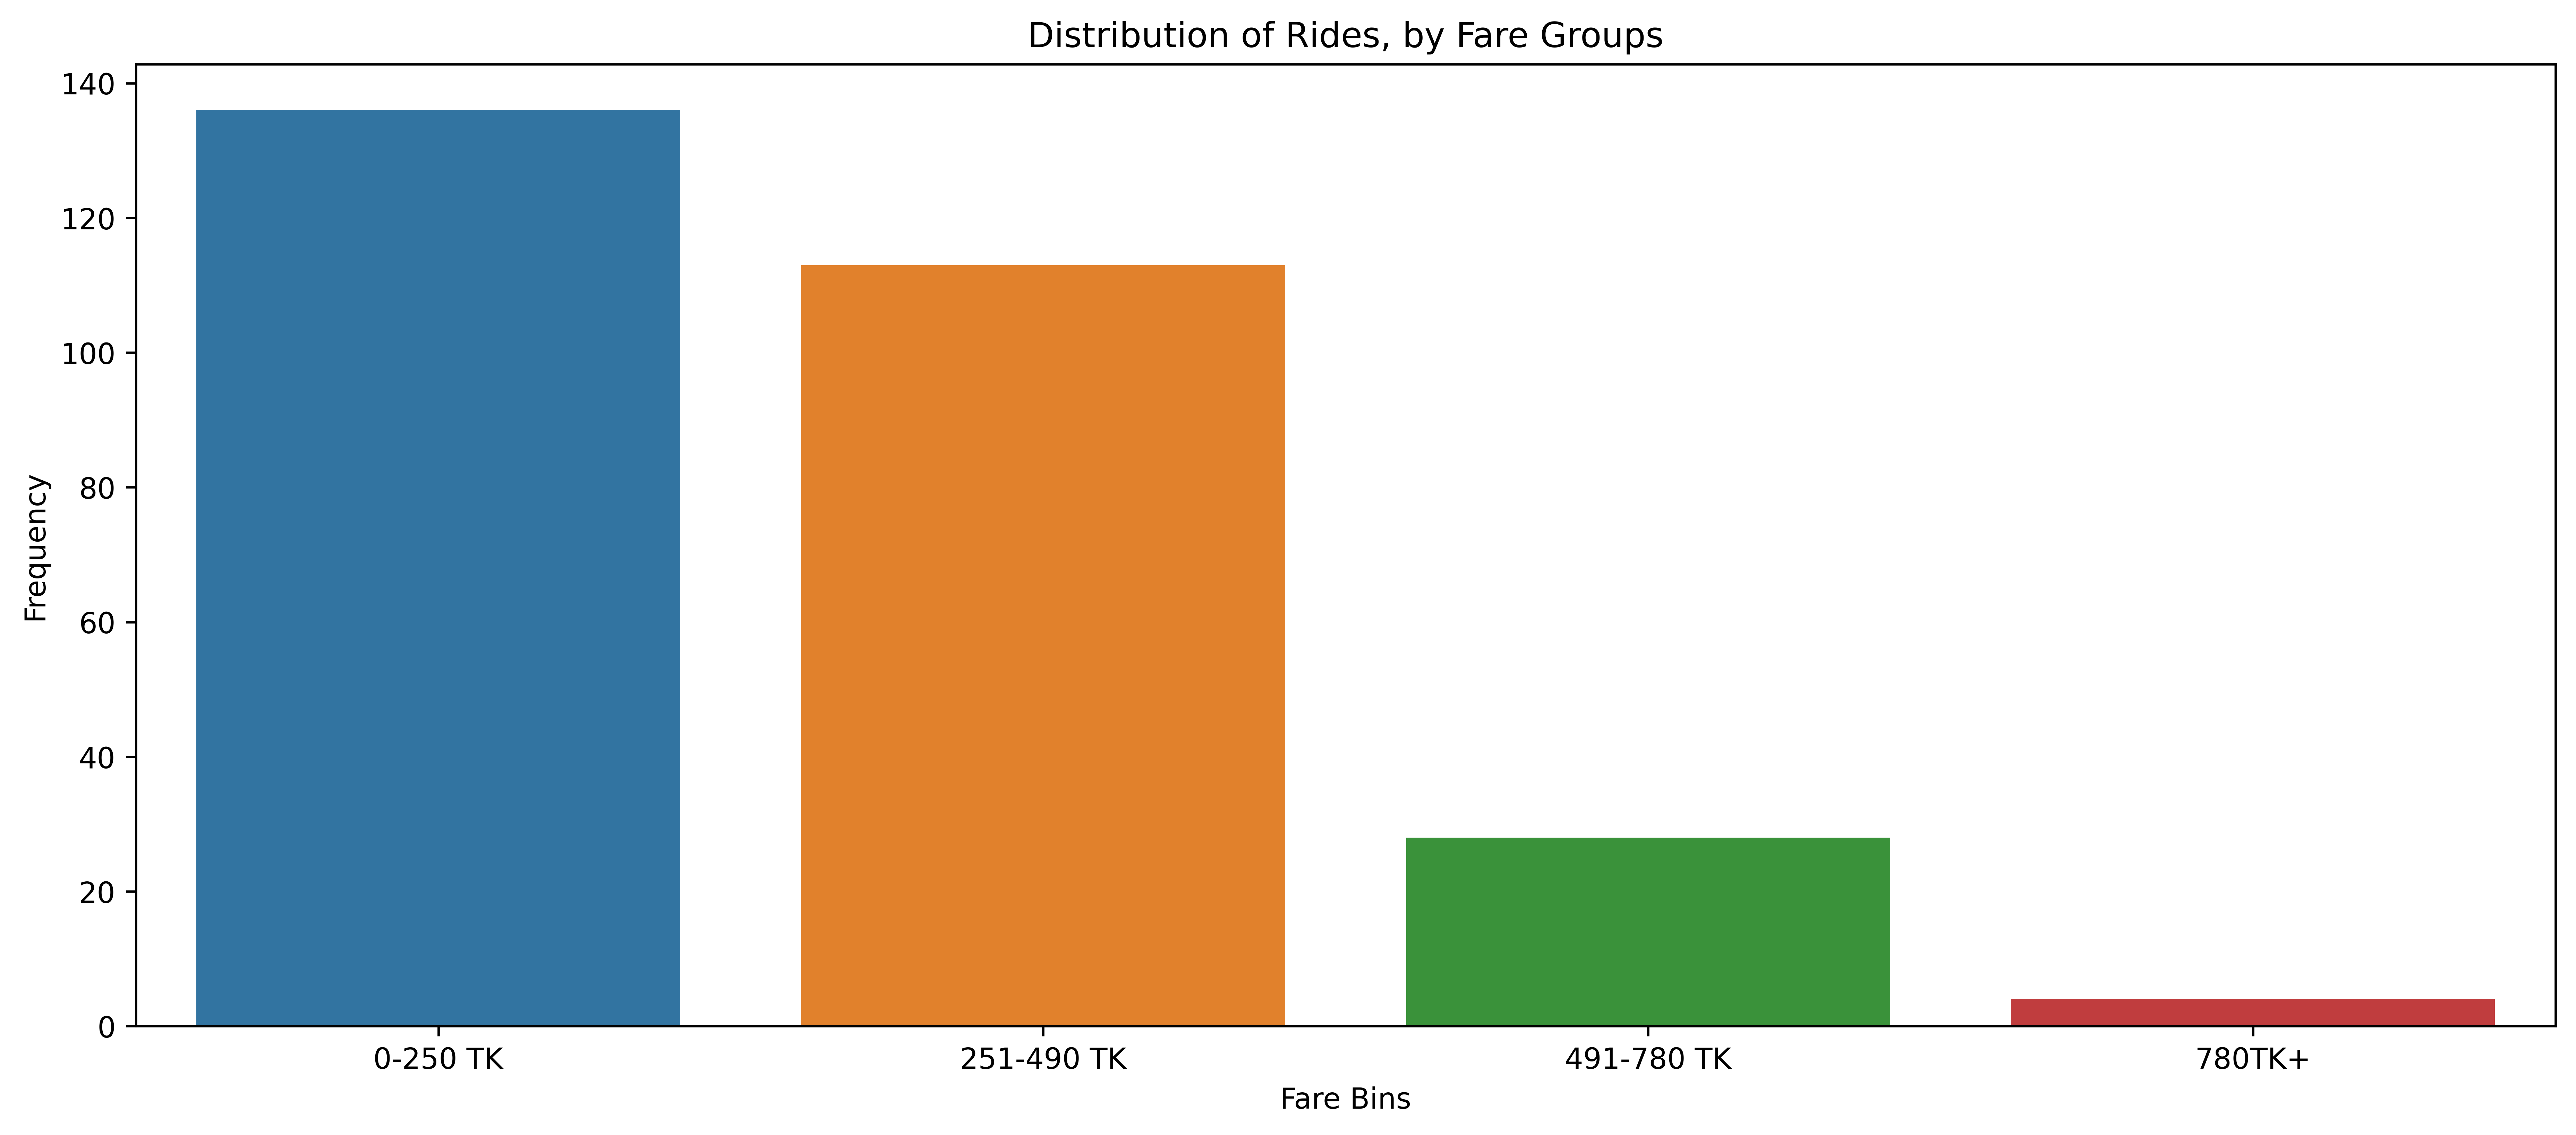

In [310]:
f, ax = plt.subplots(dpi = 600, figsize=(15, 6))
sns.barplot(
    x= "Fare Groups",
    y="Frequency",
    orient="v",
    data=fare_distribution
)
plt.xlabel("Fare Bins")
plt.ylabel("Frequency")
plt.title("Distribution of Rides, by Fare Groups");

For me, the most common rides typically cost no more than 500 taka. Although there are occasional high-end trips, they are quite rare.

Now, let's shift our focus to analyzing the number of hours I have traveled each year, along with the corresponding total amount. We will visualize these insights using two bar plots displayed below

**Task 10:** Determine the travel time in each year

In [314]:
yearly_travel_time = (
    df['duration_hour']
    .groupby(df['Year'])
    .sum().
    rename("Total Duration (hr)")
    .to_frame()
    .reset_index()
)

In [315]:
yearly_travel_time.head()

,Year,Total Duration (hr)
0,2019,59.57
1,2020,35.06
2,2021,39.14
3,2022,34.52
4,2023,11.03


**Task 11:** Visualize the data with a seaborn barplot

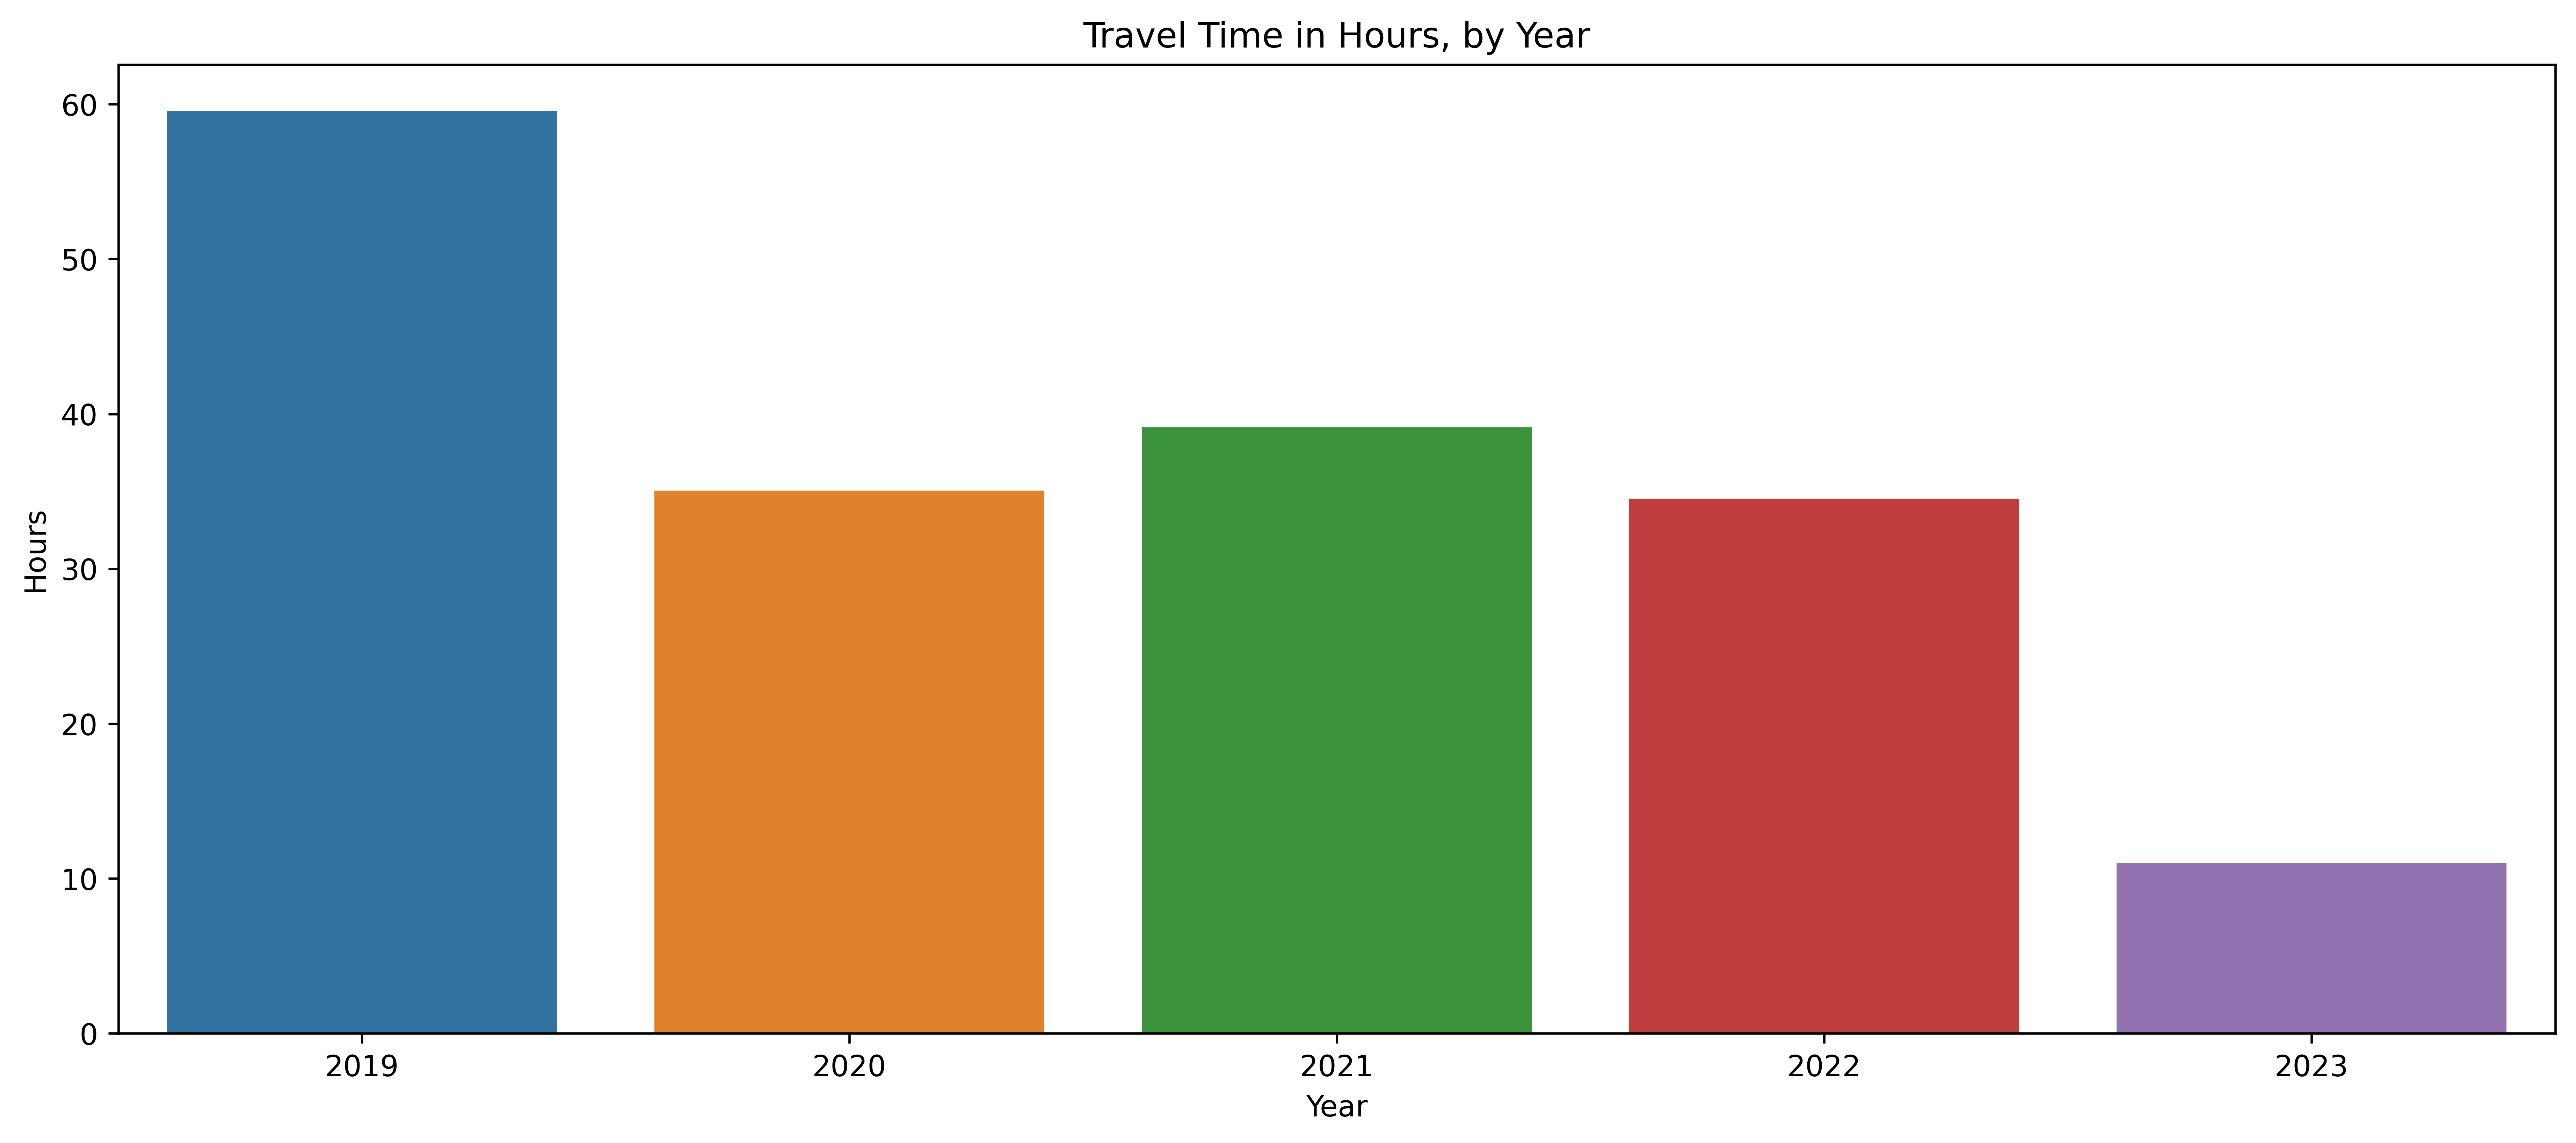

In [317]:
f, ax = plt.subplots(dpi = 600, figsize=(15, 6))
sns.barplot(
    x= "Year",
    y="Total Duration (hr)",
    orient="v",
    data= yearly_travel_time
)
plt.xlabel("Year")
plt.ylabel("Hours")
plt.title("Travel Time in Hours, by Year");


The above graph indicates that I am not a frequent user of Uber. The highest number of hours I traveled in a year was only sixty in 2019. However, it seems that my usage declined significantly in the subsequent years, possibly due to the impact of the pandemic.

**Task 12:** Calculate the Total Fare Paid in each year

In [318]:
yearly_fare = df['Fare Amount BDT'].groupby(df['Year']).sum().rename('Total Fare').to_frame().reset_index()


**Task 13:** Visualize the result with a barplot

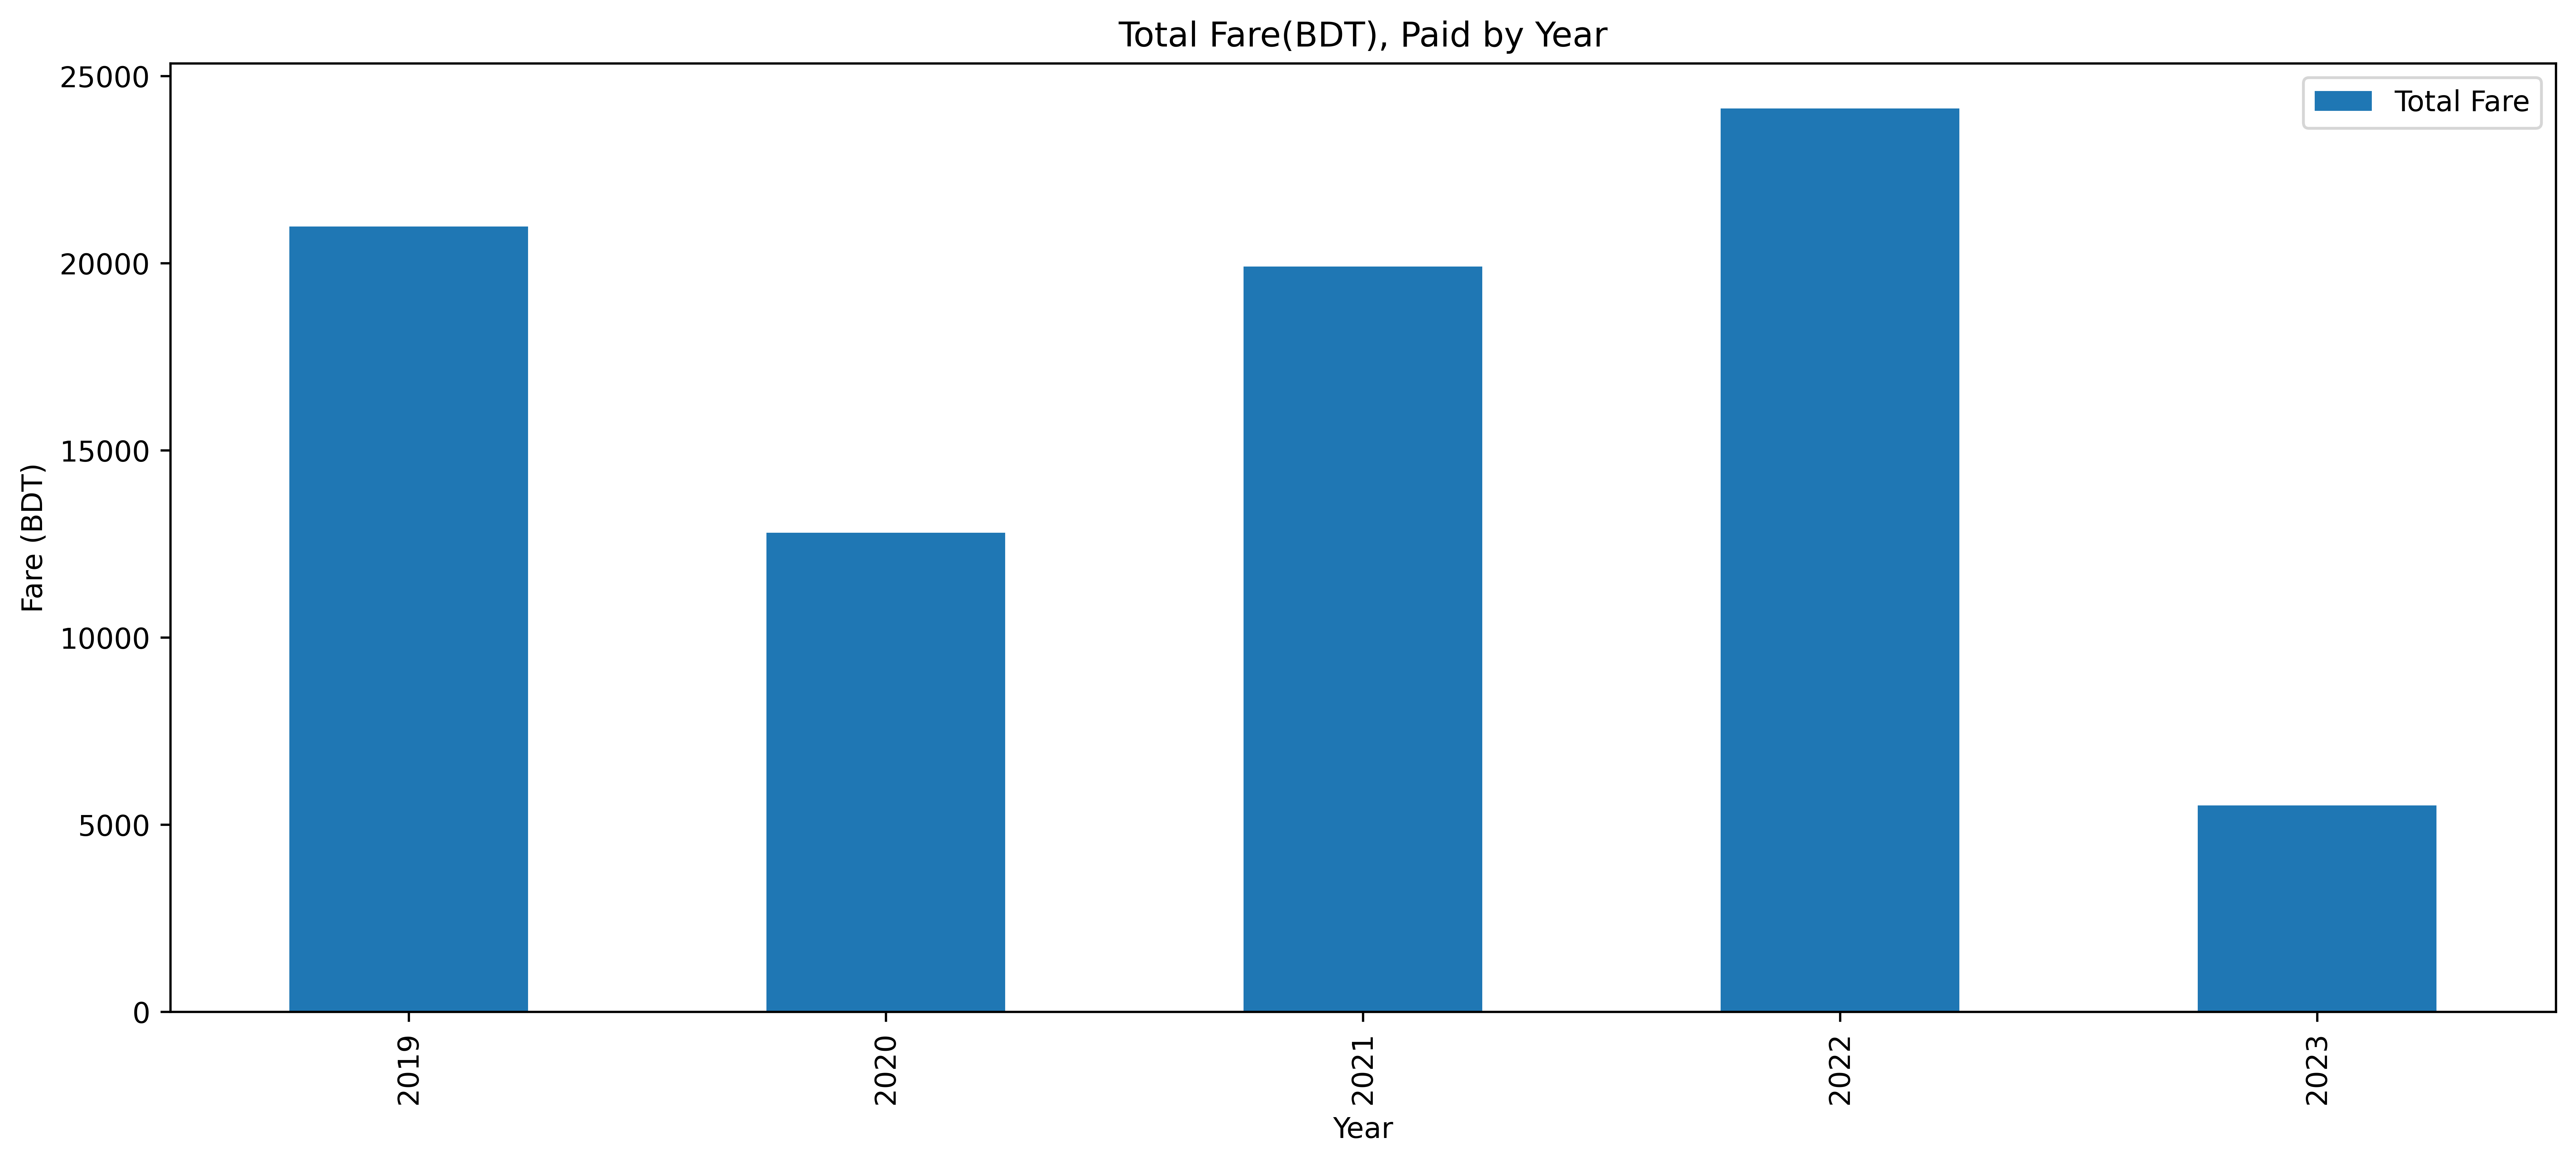

In [320]:
f, ax = plt.subplots(dpi = 600, figsize=(15, 6))
yearly_fare.plot.bar(
     x='Year', 
     y='Total Fare',  
     xlabel= 'Year',
     ylabel='Fare (BDT)', 
     title='Total Fare(BDT), Paid by Year', 
     ax=ax
);

The above graph indicates that 2022 is the year when I paid the highest amount of fare. Surprisingly, during that year, I traveled for only around thirty hours. This raises the question of what caused this increase in fare. Let's delve into the following pivot table to gain a better understanding.



**Task 14:** Create a Pivot Table to show fare paid by year for different types of rides. Replace NaNs with zero (0).

In [321]:
# Pivot table to show Total fare by Product Type and year and fill missing values with zero.
df.pivot_table(
index = 'Product Type',
columns = 'Year',
values= 'Fare Amount BDT',
aggfunc = 'sum'
).fillna(0)

Year,2019,2020,2021,2022,2023
Product Type,,,,,
CNG,0.00,0.00,0.00,0.00,730.19
Connect,0.00,0.00,0.00,193.17,0.00
Uber Moto,1885.27,1020.98,207.11,0.00,0.00
Uber Pool,1767.54,1340.00,0.00,0.00,0.00
Uber Premier,2325.97,722.90,0.00,1936.34,0.00
UberX,14387.39,5881.42,19702.53,18580.73,4784.47
UberXL,615.08,3830.84,0.00,0.00,0.00
XL Intercity,0.00,0.00,0.00,3421.76,0.00


Upon closer examination, it becomes evident why the year 2022 showcases a notably high value. The presence of an intercity trip plays a significant role in driving up the overall fare for that year. In contrast, in 2019, I had a relatively active year of travel, utilizing all three ride options: Moto, X, and Pool. This diverse usage pattern contributes to the higher fare during that period. It is worth mentioning that Uber Pool was only available for a limited duration prior to the emergence of the pandemic. As for 2020, my Uber usage decreased significantly. However, CNG rides appear to hold promise, although their availability began in 2023.

To conclude this phase of the analysis, we will present two additional statistics. It is apparent that UberX is my preferred ride option. Hence, I aim to determine the percentage of requests made for the top five ride category. Additionally, I would like to showcase the proportion of the total fare amount attributed to them as well.

**Task 15:** Count the percentage of requests for top 5 rides

In [322]:
# count the unique Product type
df["Product Type"].value_counts(normalize=True).sort_values().tail(5).round(2)


UberXL          0.02
Uber Premier    0.05
Uber Pool       0.07
Uber Moto       0.11
UberX           0.73
Name: Product Type, dtype: float64

Here we see the percentages of requests made, in ascending order, for the top five ride categories. Let's see the amount 

**Task 16:** Calculate total amount of fare for the top 5 rides

In [282]:
df["Fare Amount BDT"].groupby(df["Product Type"]).sum().sort_values().tail(5)


Product Type
Uber Moto        3113.36
XL Intercity     3421.76
UberXL           4445.92
Uber Premier     4985.21
UberX           63336.54
Name: Fare Amount BDT, dtype: float64

Over 63,000 BDT was spent on UberX rides! Now, let's examine the distribution of the Fare Amount. We observe that the maximum fare amount is 3421 BDT, while the 75th percentile is approximately 400 BDT. This large outlier value has a notable influence, pulling the mean towards it. We can gain a clearer understanding of this information through the subsequent box plot and histogram visualizations.

**Task 17:** See the distribution of numerical columns

In [268]:
df.describe().drop(columns =['Begin Trip Lat', 'Begin Trip Lng', 'Dropoff Lat', 'Dropoff Lng']).round(2)

,Distance (miles),duration_hour,Fare Amount BDT
count,281.00,281.00,281.00
mean,4.95,0.64,296.56
std,3.04,0.35,252.69
min,0.00,0.08,30.43
25%,2.79,0.38,154.67
50%,4.56,0.59,256.28
75%,6.22,0.81,396.96
max,25.96,2.24,3421.76


**Task 18:** Understand the Fare distribution with a boxplot

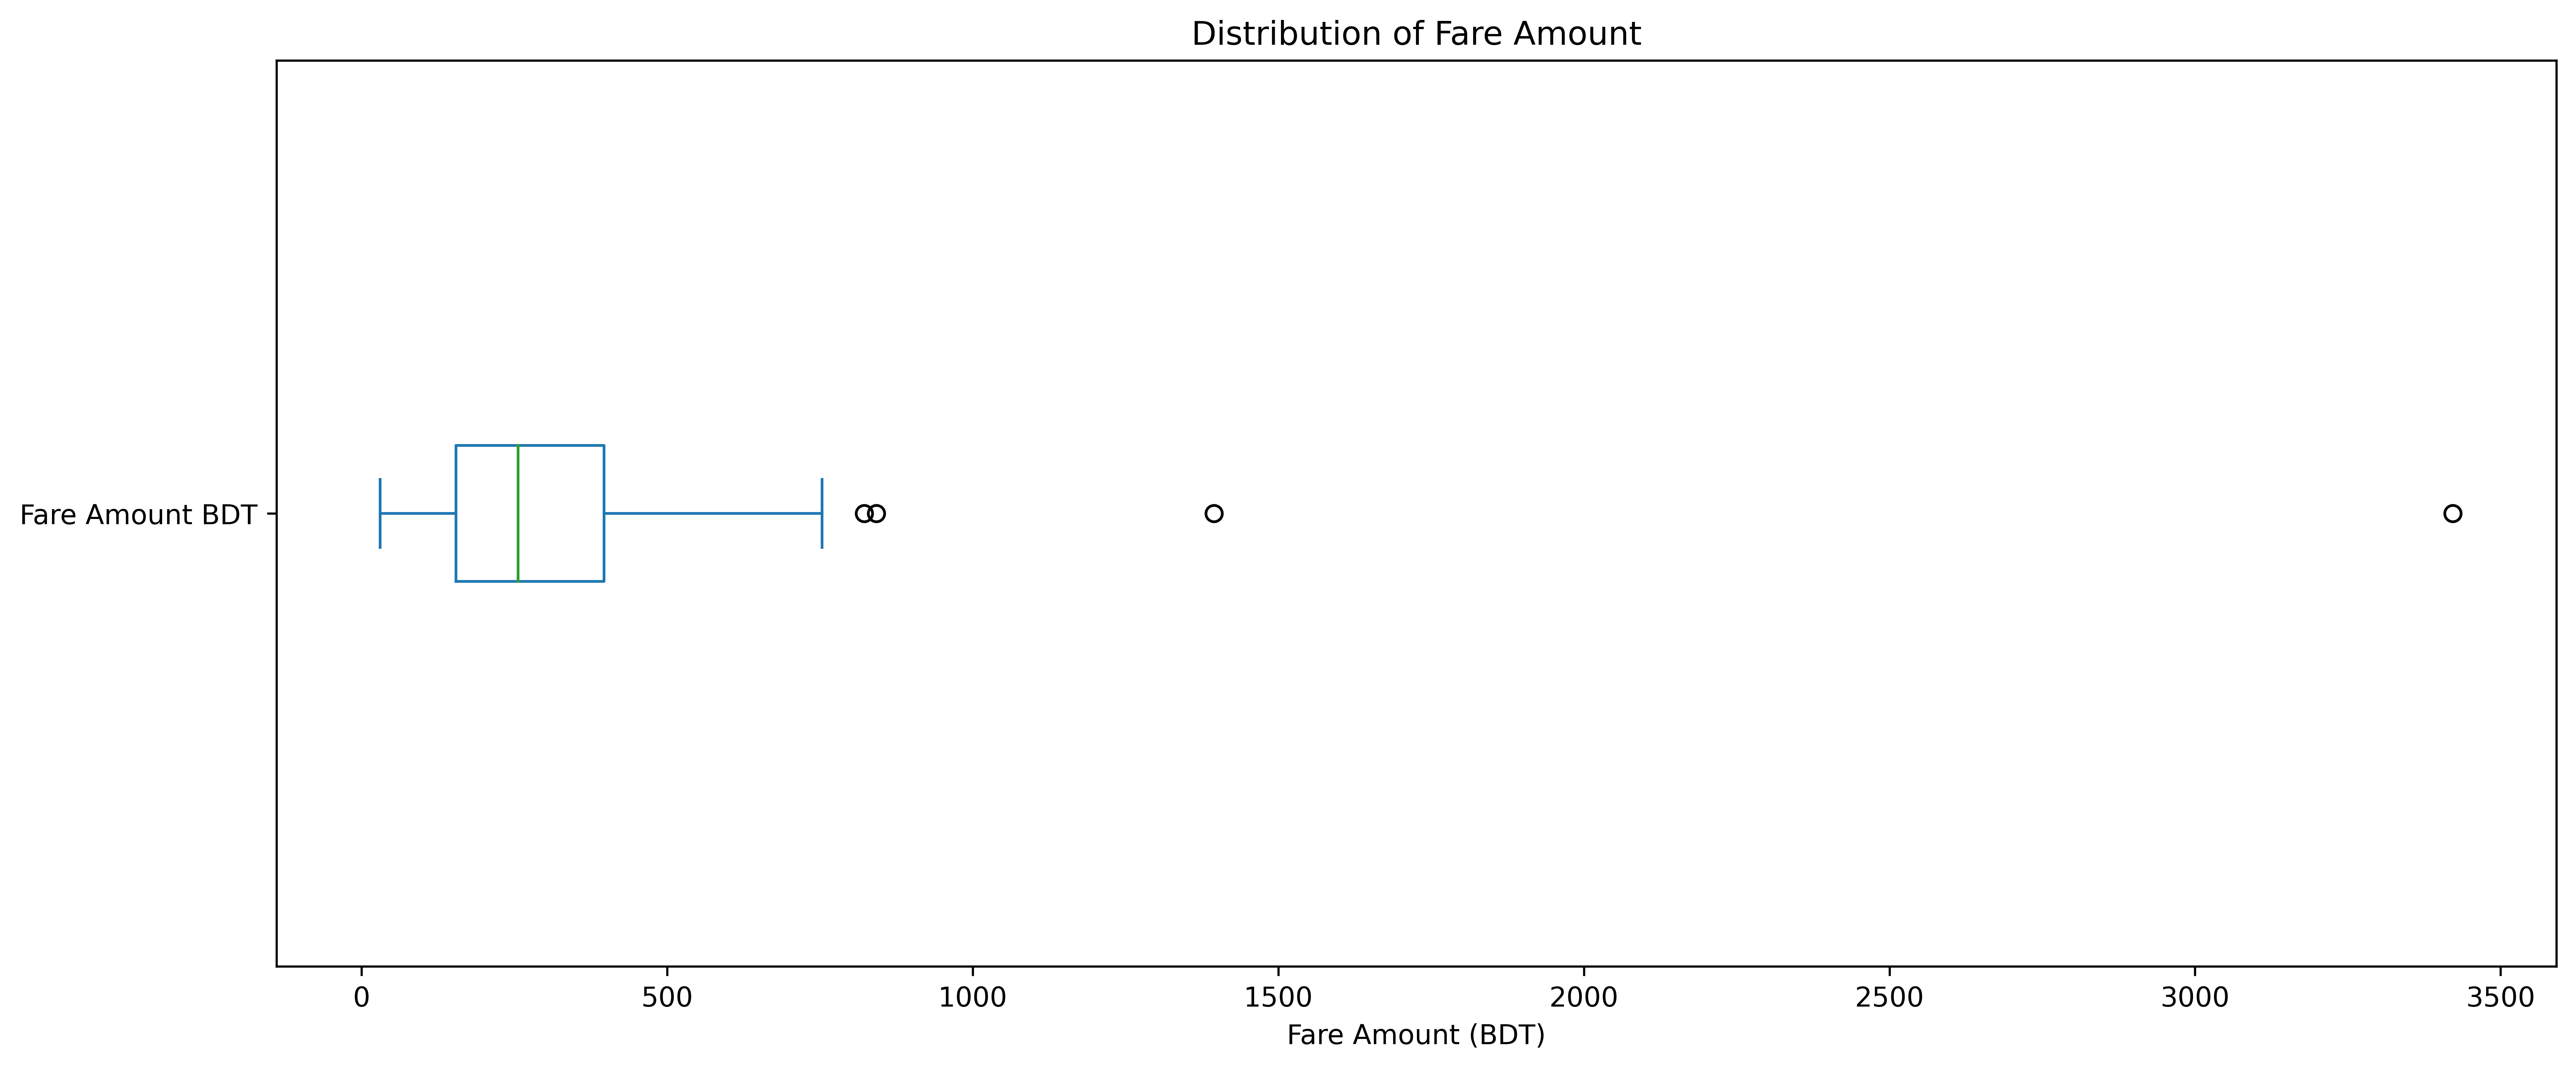

In [283]:
fig, ax = plt.subplots(dpi=600, figsize=(15,6))
df['Fare Amount BDT'].plot(kind="box", vert=False, title = "Distribution of Fare Amount", ax=ax)
ax.set_xlabel("Fare Amount (BDT)");

**Task 19:** Visualize the variable with its histogram

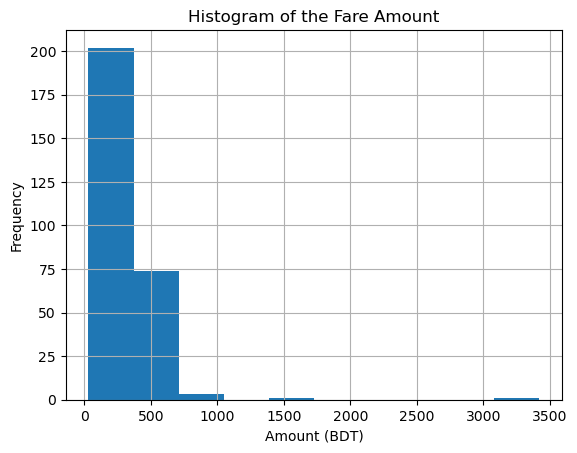

In [287]:
df['Fare Amount BDT'].hist()
plt.title("Histogram of the Fare Amount")
plt.xlabel("Amount (BDT)")
plt.ylabel("Frequency");

The histogram of our data reveals significant skewness due to the presence of outliers. To address this, let's clip the data and remove these high values. Additionally, I would like to exclude "Connect" and "UberXL" ride categories from the analysis. We will create a new dataframe called "df_filtered" to represent the filtered data.

### Analysis for a filtered Data Set

**Task 20:** Filter the data for three product types; "Connect", "XL Intercity", "UberXL". Ensure the frame is free from these three types.

In [288]:
df_filtered = df[~df['Product Type'].isin(['Connect', 'XL Intercity', 'UberXL'])]

First of all, let's create a boxplot for each category to see the distribution of fares.

**Task 21:** Plot boxplots of fare amount for each of these categories. Use seaborn for a fancier plot.

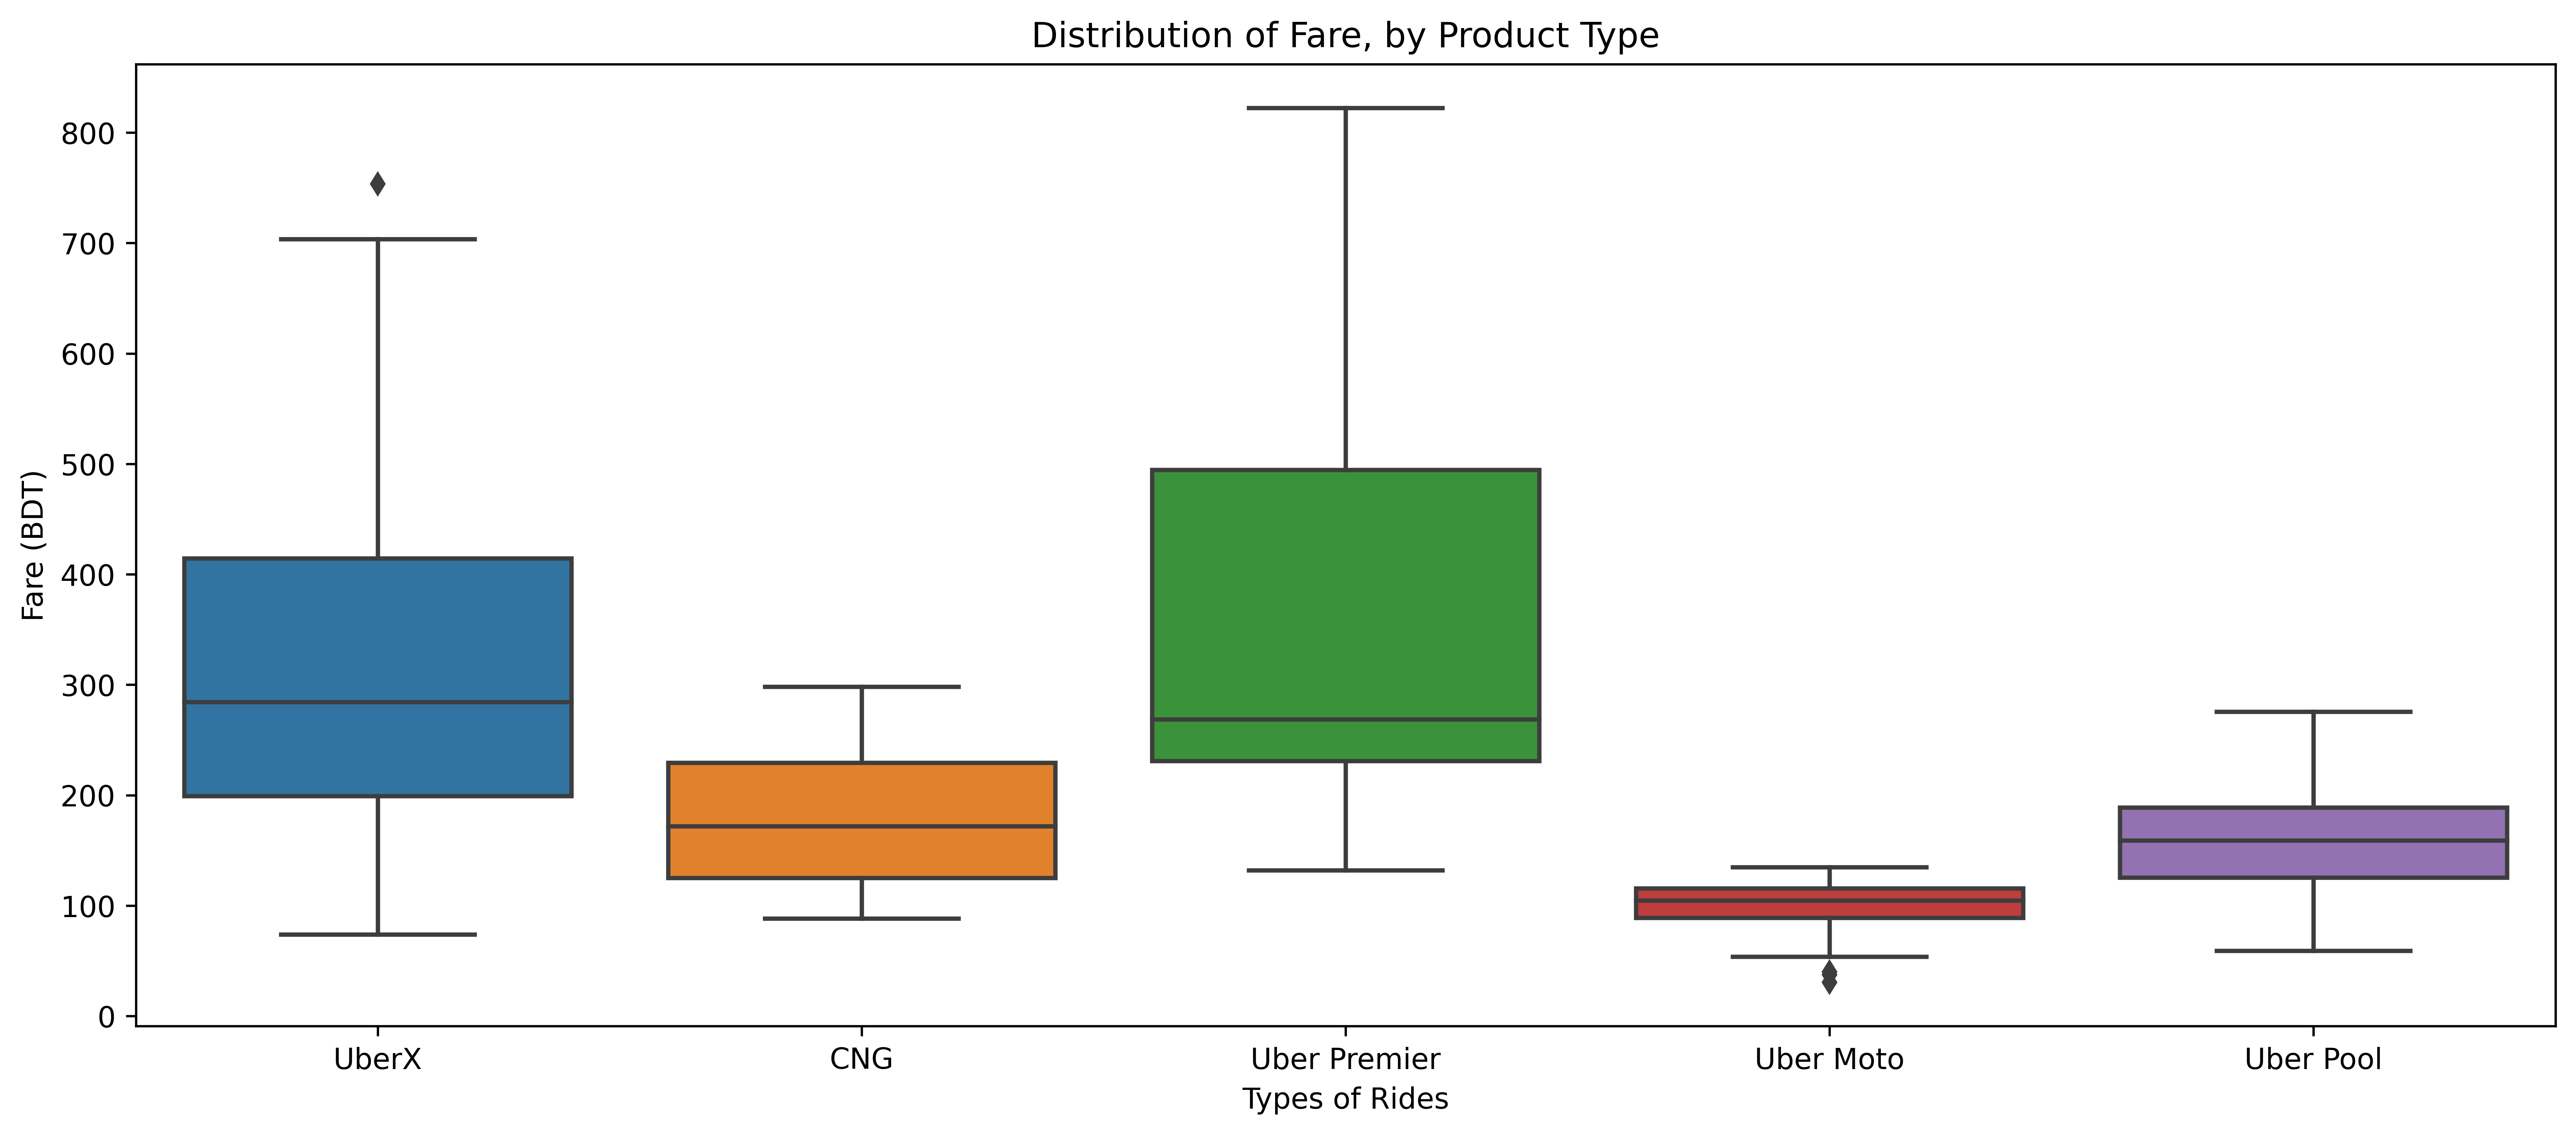

In [290]:
fig,ax = plt.subplots(dpi=600, figsize=(15, 6))
sns.boxplot(x="Product Type", y="Fare Amount BDT", data=df_filtered, ax=ax)
plt.xlabel("Types of Rides")
plt.ylabel("Fare (BDT)")
plt.title("Distribution of Fare, by Product Type");

Nice, much clearer and fancier graph with seaborn. Let's look at the pickup addresses with a scatter mapbox visual. I am going to use a plotly plot for this.

**Task 22:** Use plotly express to create a scatter plot of pickup addresses.

In [323]:
fig = px.scatter_mapbox(
    df_filtered,  # Our DataFrame
    lat="Begin Trip Lat",
    lon="Begin Trip Lng",
    width=950,  # Width of map
    height=600,  # Height of map
    color="Fare Amount BDT",
    hover_data=["Fare Amount BDT"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

Great! With the street view, we can see from where I begin these trips.

As we near the end of this report, let's explore the relationship between Fare and the distance of the trips across all ride categories. To visualize this, we will utilize Plotly to create a scatter plot.

**Task 23:** Using plotly, plot a scatter graph to the relationship between Fare and Miles Traveled. Use respective colors to indicate different product types.

In [324]:
fig = px.scatter(
    data_frame=df_filtered,
    x="Distance (miles)",
    y="Fare Amount BDT",
    color = "Product Type",
    title="Fare and Miles Traveled with Different Rides"

)
fig.update_layout(xaxis_title="Distnace (Miles)", yaxis_title="Fare (BDT)")
fig.show()

Uber Pool and Moto emerge as the most budget-friendly options, positioned at the bottom of the scatter plot. However, it's worth noting that Pool is no longer available, leaving Moto and CNG as the economical choices for affordable rides. On the other hand, UberX dominates the plot, occupying a significant portion of the data points. The presence of green dots represents Premier trips, indicating higher fares for a luxurious service

**Conclusion:** Uber is not a regular mode of transportation for me; however, I find it extremely useful when necessary. Due to my aversion to riding motorbikes, I tend to opt for UberX trips more frequently. The introduction of CNG rides has been a source of happiness for me, as it ensures the availability of affordable rides on-demand.